<a href="https://colab.research.google.com/github/pradeeps1111/DataScience_Assignments/blob/main/Hackathon_credit_analysis_21_10_2023_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Assessment in Fintech Industry

# Libraries Needed

In [ ]:


import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')

##EDA##
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocess
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer


# Load Dataset

In [ ]:
train = pd.read_csv("/content/train_loan_data.csv")
test = pd.read_csv("/content/test_loan_data.csv")


In [ ]:
print("Train data: {} features and {} observations".format(train.shape[1],train.shape[0]))
print("Test data: {} features and {} observations".format(test.shape[1],test.shape[0]))

Train data: 28 features and 80000 observations
Test data: 27 features and 20000 observations


# Checking For Duplicates

In [ ]:
train.duplicated().sum()
test.duplicated().sum()

0

# Merging train and test data

In [ ]:
data = pd.concat([train,test])
data.head(2)

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0         Jul-1997  10+ years   
1         CA     40000.0         Apr-1987  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     5338.0        93.6         E1   60 months   
1  debt_consolidation    19944.0        60.3         B1   36 months   

                title  total_acc  verification_status  loan_status  
0  Debt consolidation        8.0      Source Verified  Charged Off  
1         Credit Loan       12.0             Verified   Fully Paid  

[2 rows x 28 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   addr_state            100000 non-null  object 
 1   annual_inc            100000 non-null  float64
 2   earliest_cr_line      100000 non-null  object 
 3   emp_length            94154 non-null   object 
 4   emp_title             93604 non-null   object 
 5   fico_range_high       100000 non-null  float64
 6   fico_range_low        100000 non-null  float64
 7   grade                 100000 non-null  object 
 8   home_ownership        100000 non-null  object 
 9   application_type      100000 non-null  object 
 10  initial_list_status   100000 non-null  object 
 11  int_rate              100000 non-null  float64
 12  loan_amnt             100000 non-null  float64
 13  num_actv_bc_tl        95041 non-null   float64
 14  mort_acc              96525 non-null   float64
 15  t

In [ ]:
data.head(10)

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0         Jul-1997  10+ years   
1         CA     40000.0         Apr-1987  10+ years   
2         FL     60000.0         Aug-2007  10+ years   
3         IL    100742.0         Sep-1980  10+ years   
4         MD     80000.0         Jul-1999  10+ years   
5         CA     51488.0         May-1991        NaN   
6         NY    100000.0         Oct-1986  10+ years   
7         PA     35028.0         Nov-1995    3 years   
8         FL     59292.0         Dec-2007        NaN   
9         CA     65000.0         Jun-2004   < 1 year   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   
2                Marble polishing            679.0           675.0     B   
3                         printer            664.0           660.0     B   
4                   Southern Mgmt            669.0           665.0     F   
5                             NaN            679.0           675.0     D   
6                              RN            699.0           695.0     C   
7                            SHHC            679.0           675.0     C   
8                             NaN            664.0           660.0     B   
9                           Nurse            684.0           680.0     D   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   
5       MORTGAGE       Individual  ...                  0.0   
6       MORTGAGE       Individual  ...                  0.0   
7           RENT       Individual  ...                  0.0   
8       MORTGAGE       Individual  ...                  0.0   
9           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     5338.0        93.6         E1   60 months   
1  debt_consolidation    19944.0        60.3         B1   36 months   
2  debt_consolidation    23199.0        88.5         B5   36 months   
3  debt_consolidation    18425.0        69.0         B2   36 months   
4  debt_consolidation    34370.0        90.0         F5   60 months   
5    home_improvement    10747.0        53.9         D3   36 months   
6         credit_card    32488.0        54.1         C1   36 months   
7  debt_consolidation    13147.0        78.3         C4   36 months   
8  debt_consolidation     1054.0        23.4         B4   36 months   
9  debt_consolidation     8991.0        64.7         D4   36 months   

                         title  total_acc  verification_status  loan_status  
0           Debt consolidation        8.0      Source Verified  Charged Off  
1                  Credit Loan       12.0             Verified   Fully Paid  
2           Debt consolidation       16.0      Source Verified   Fully Paid  
3           Debt consolidation       19.0      Source Verified   Fully Paid  
4          Debt Connsolidation       59.0             Verified   Fully Paid  
5             Home improvement       37.0             Verified   Fully Paid  
6      Credit card refinancing       36.0             Verified   Fully Paid  
7  Credit consolidation sought       19.0         Not Verified   Fully Paid  
8                          NaN       23.0             Verified   Fully Paid  
9           Debt consolidation       20.0      Source Verified   Fully Paid  

[10 rows x 28 columns]

In [ ]:
data_eda = data.copy()

# EDA

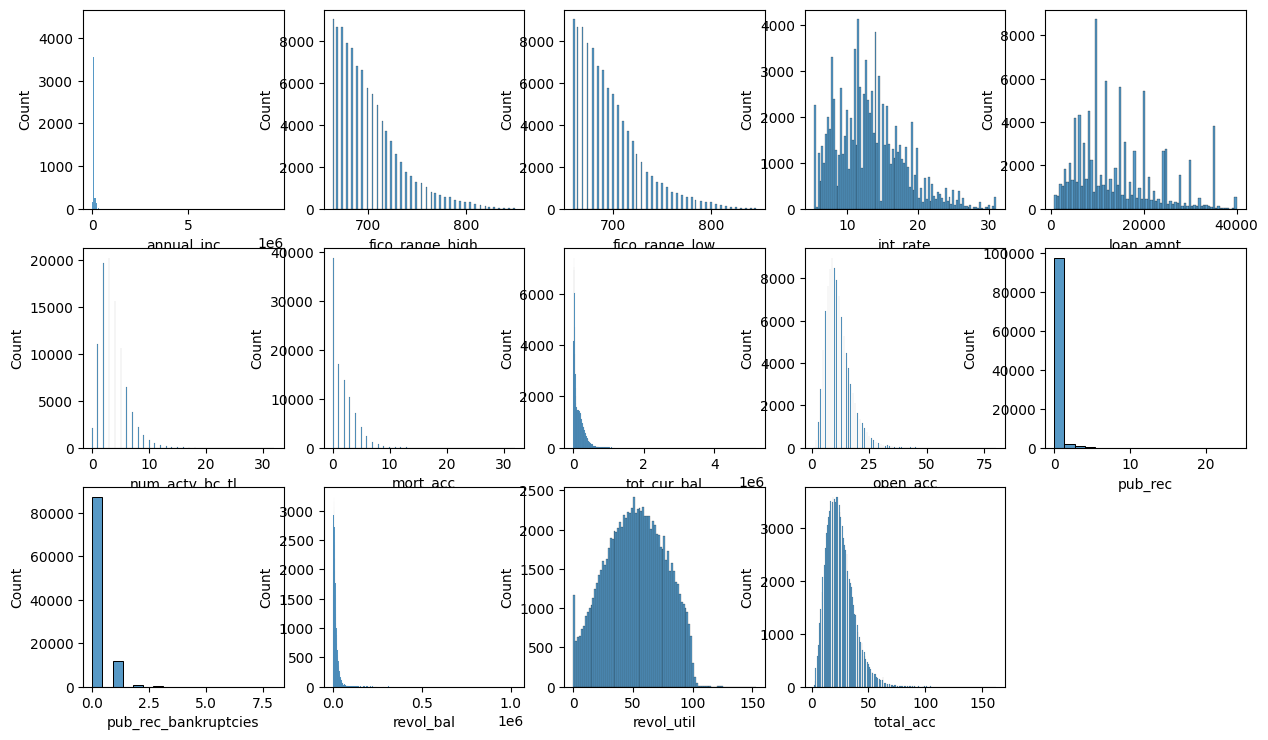

In [ ]:
nrows=5
ncols=5
itr=1

plt.figure(figsize=(15,15))

for col in data.select_dtypes(include = np.number).columns:
  plt.subplot(nrows,ncols,itr)
  sns.histplot(data[col])
  itr+=1
plt.show()


##for col in data.select_dtypes(include = np.number).columns:
##    print(col)
##    sns.histplot(data[col])
##    plt.show()


<Axes: xlabel='addr_state'>

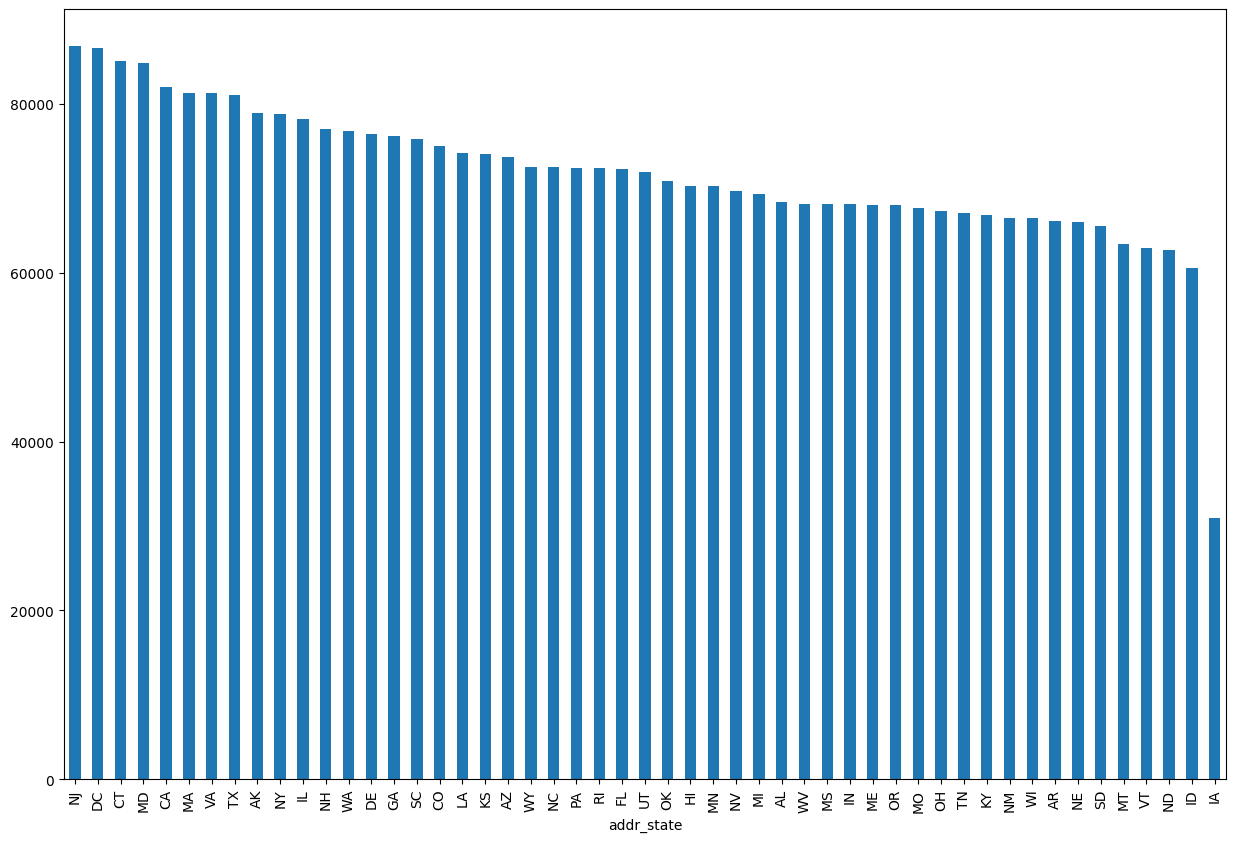

In [ ]:
plt.figure(figsize=(15,10))
data.groupby(('addr_state'))['annual_inc'].mean().sort_values(ascending = False).plot.bar()

<Figure size 2500x1700 with 0 Axes>

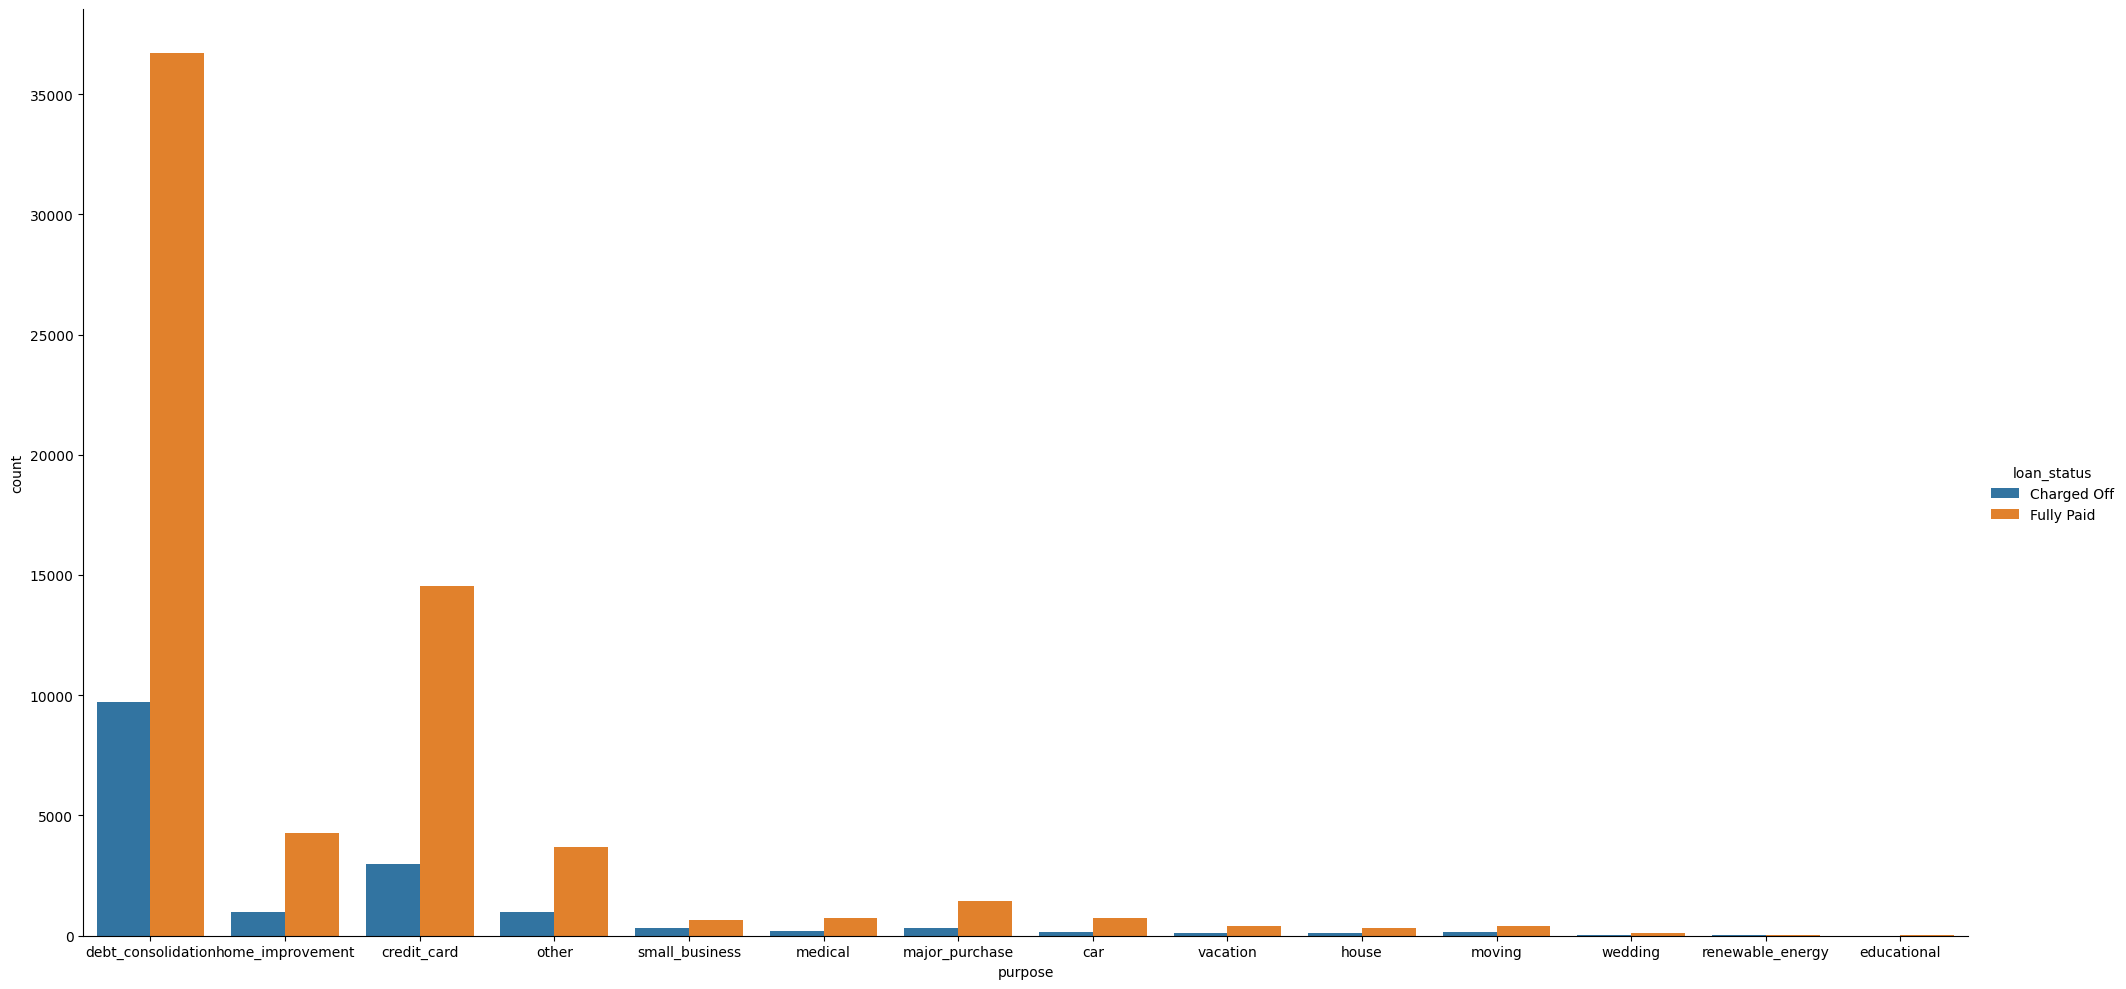

In [ ]:
plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "purpose", kind="count",hue = "loan_status",height=10, aspect=2)

<Figure size 2500x1700 with 0 Axes>

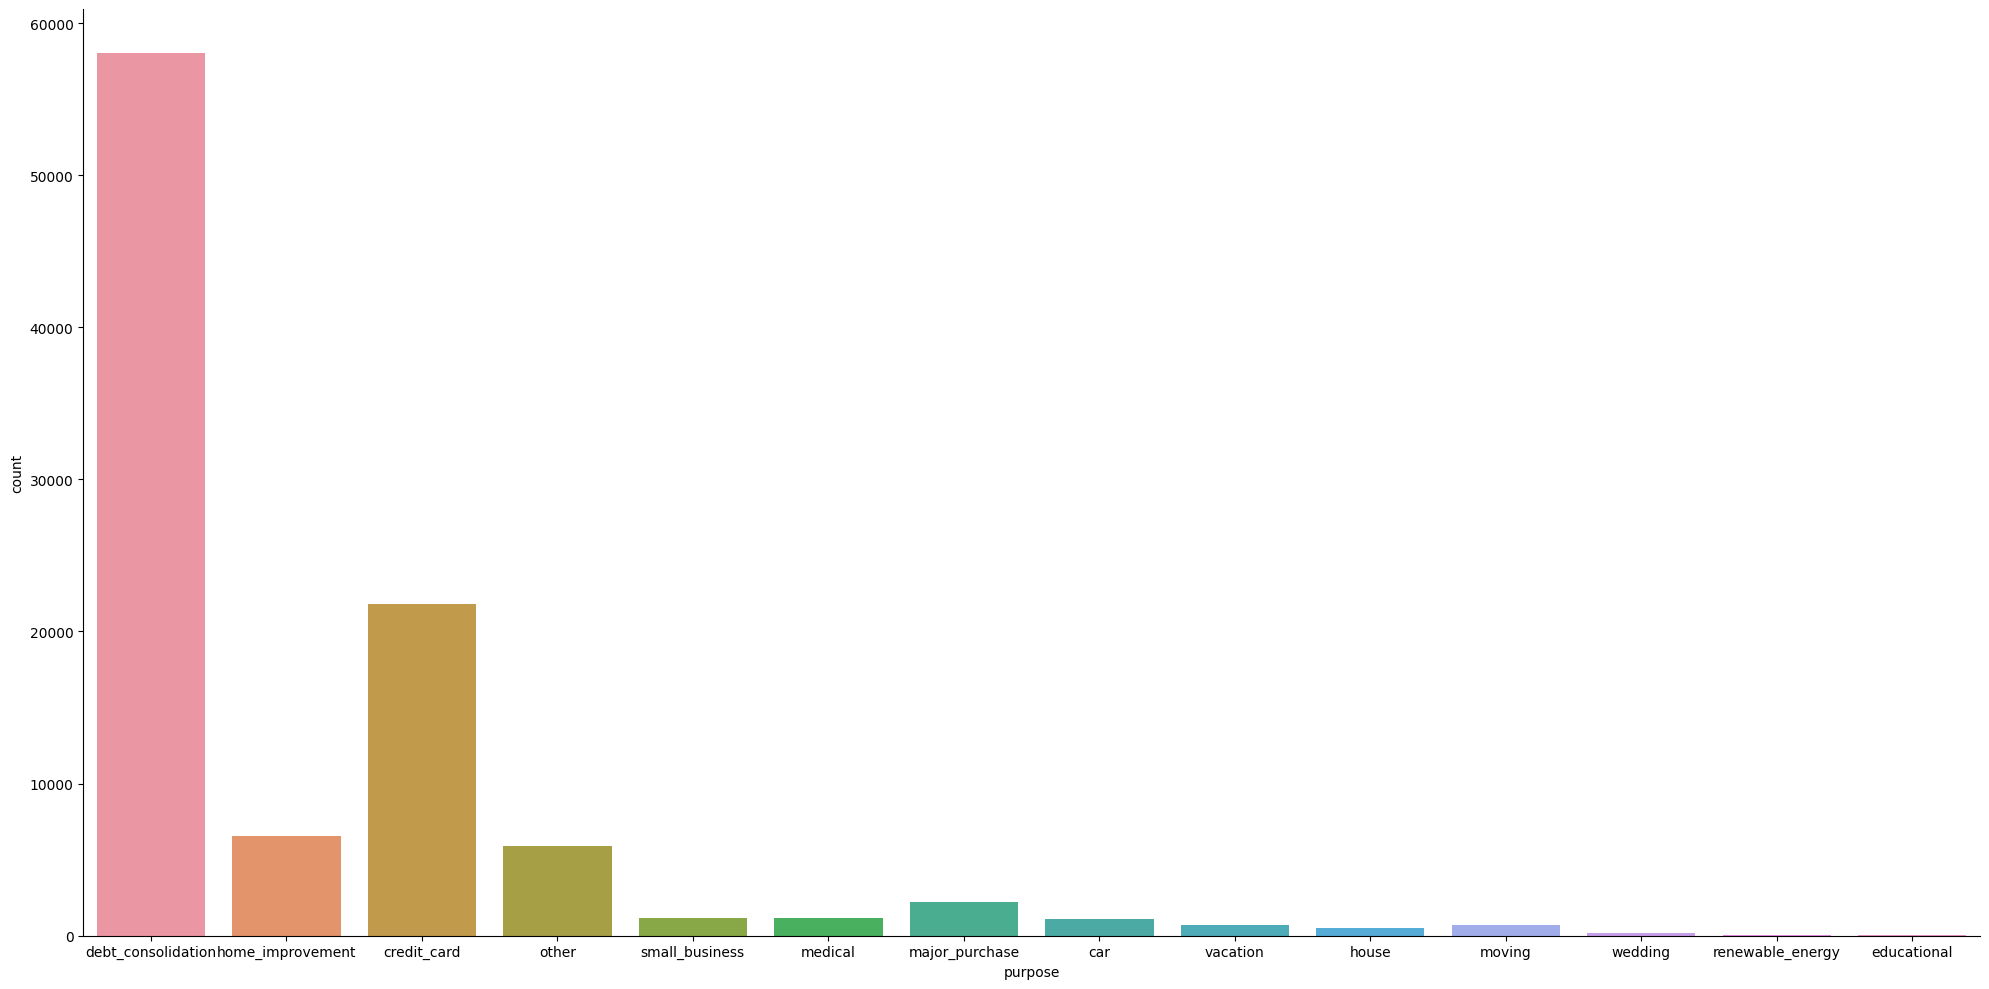

In [ ]:
plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "purpose", kind="count",height=10, aspect=2)

<Figure size 2500x1700 with 0 Axes>

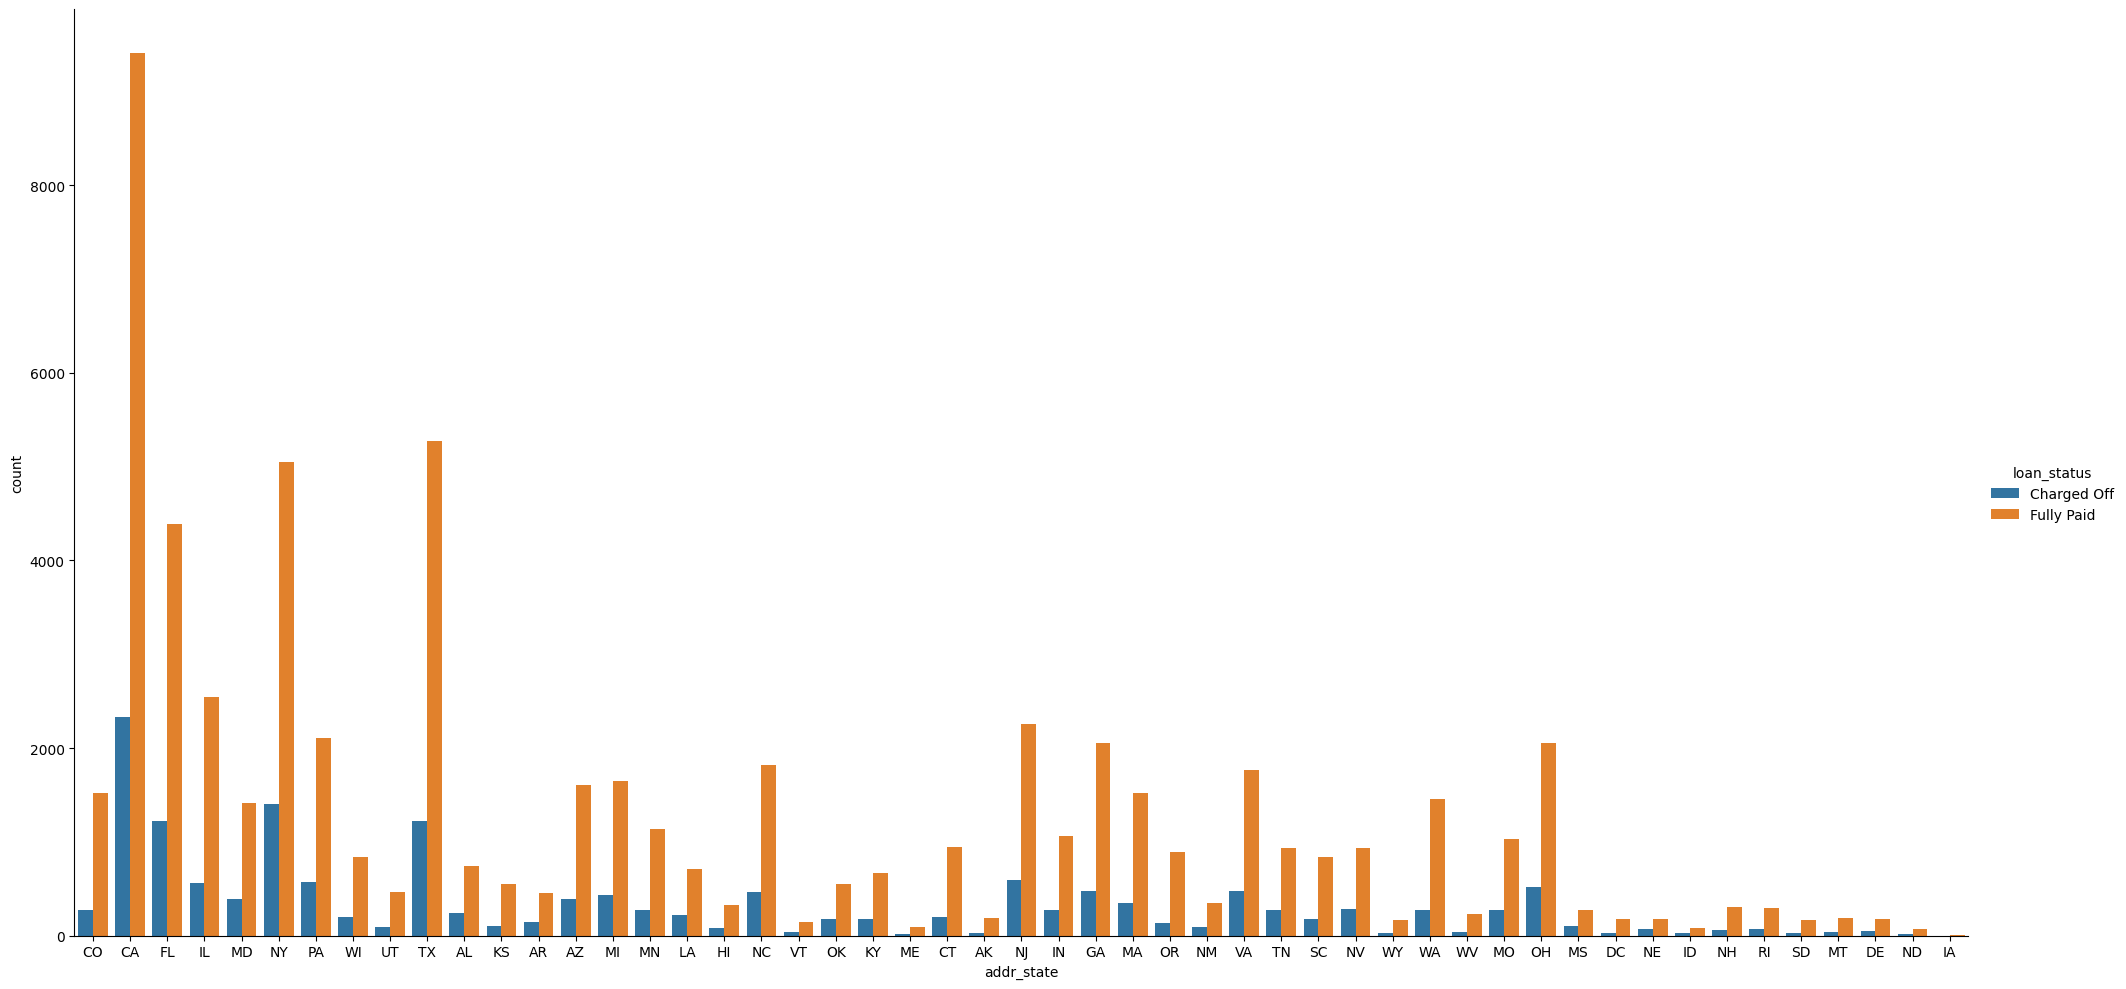

In [ ]:
plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "addr_state", kind="count",hue = "loan_status",height=10, aspect=2)

<Axes: >

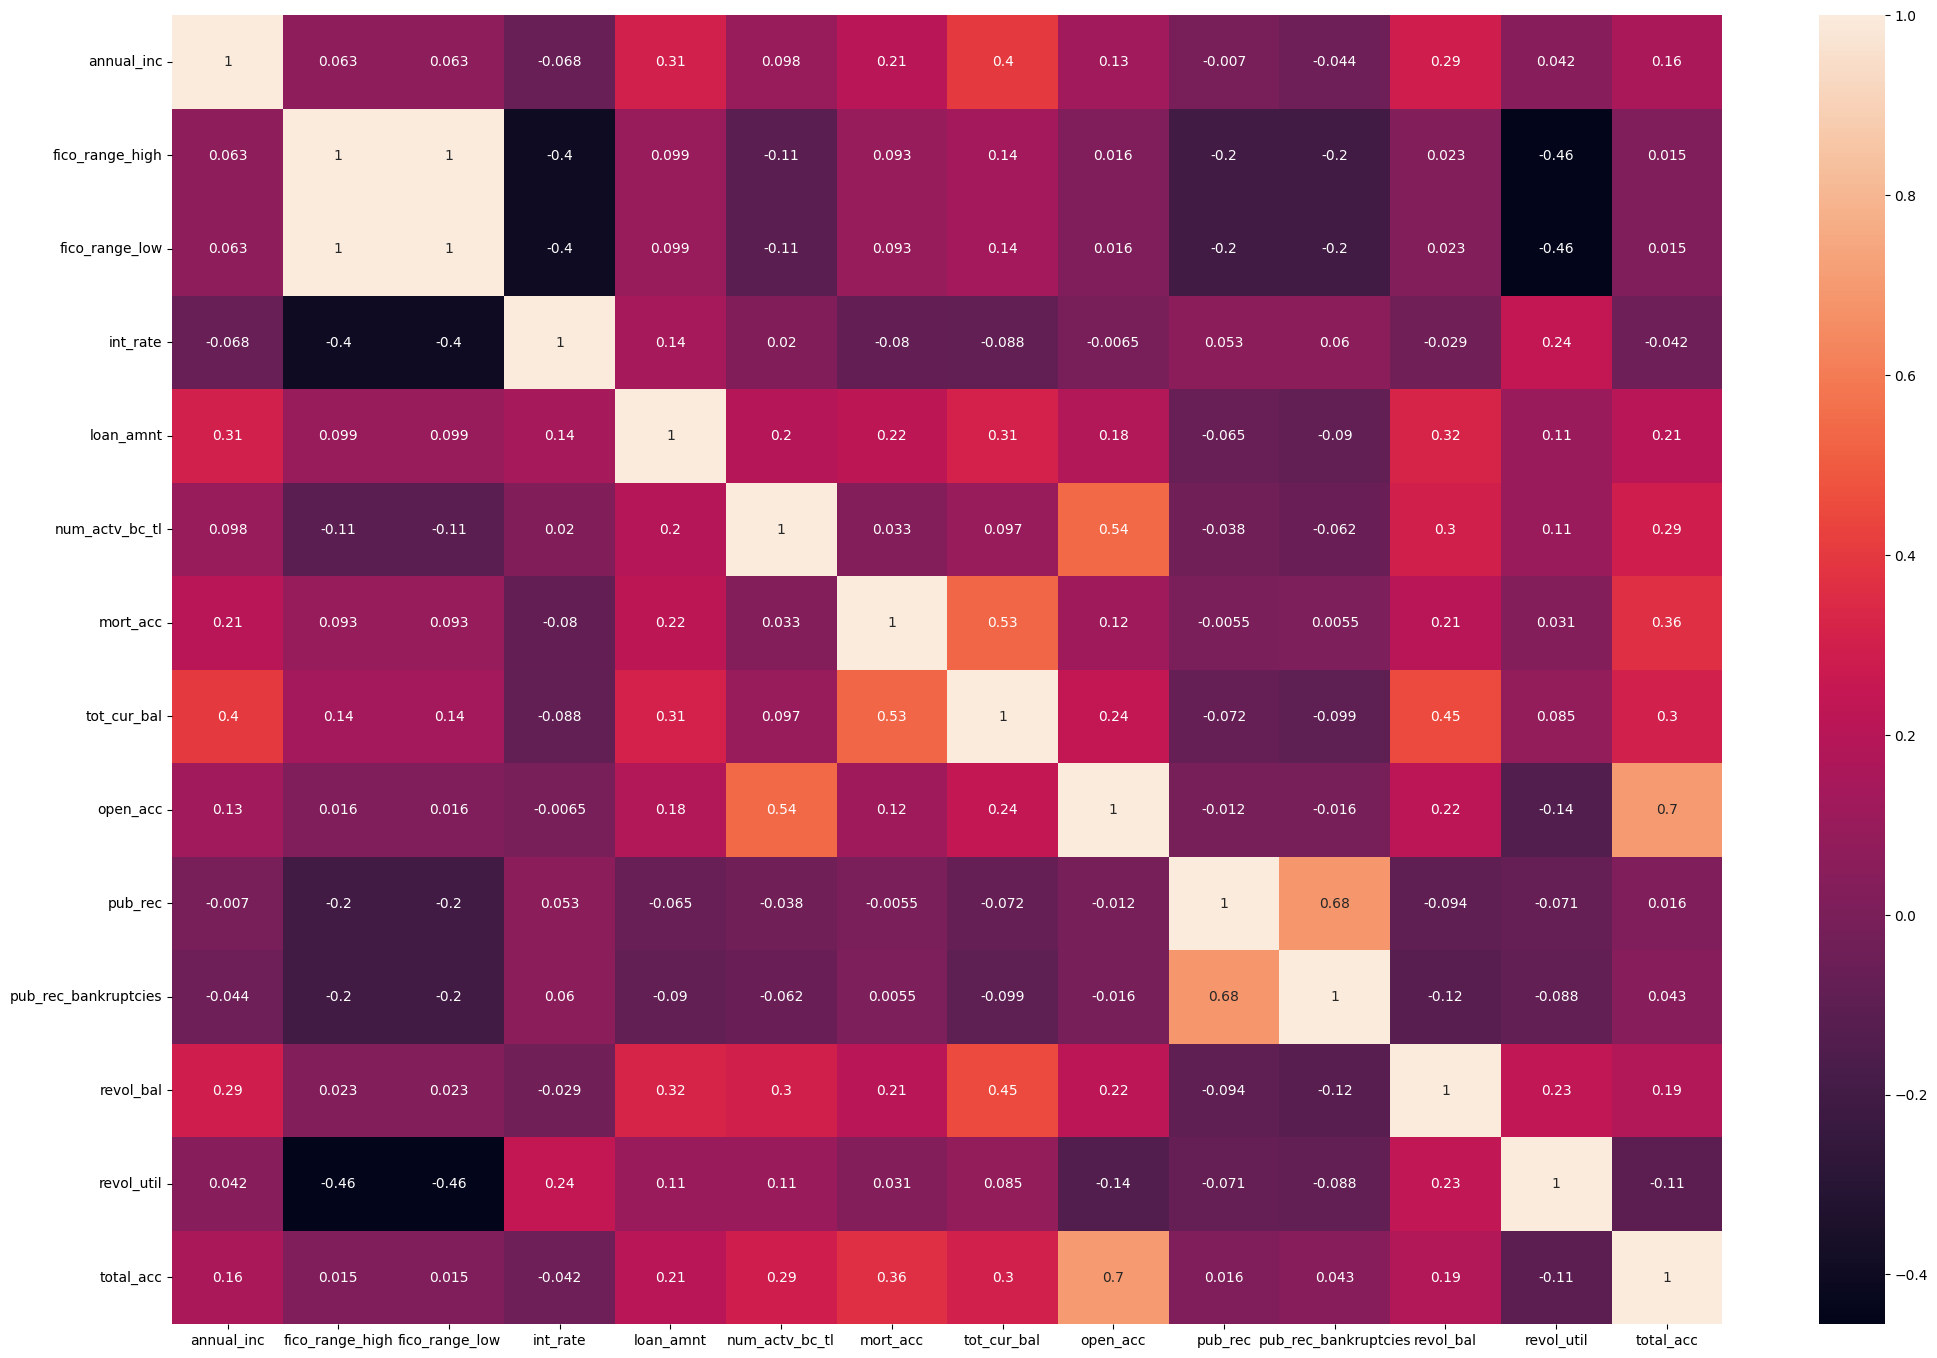

In [ ]:
plt.figure(figsize=(25,17))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

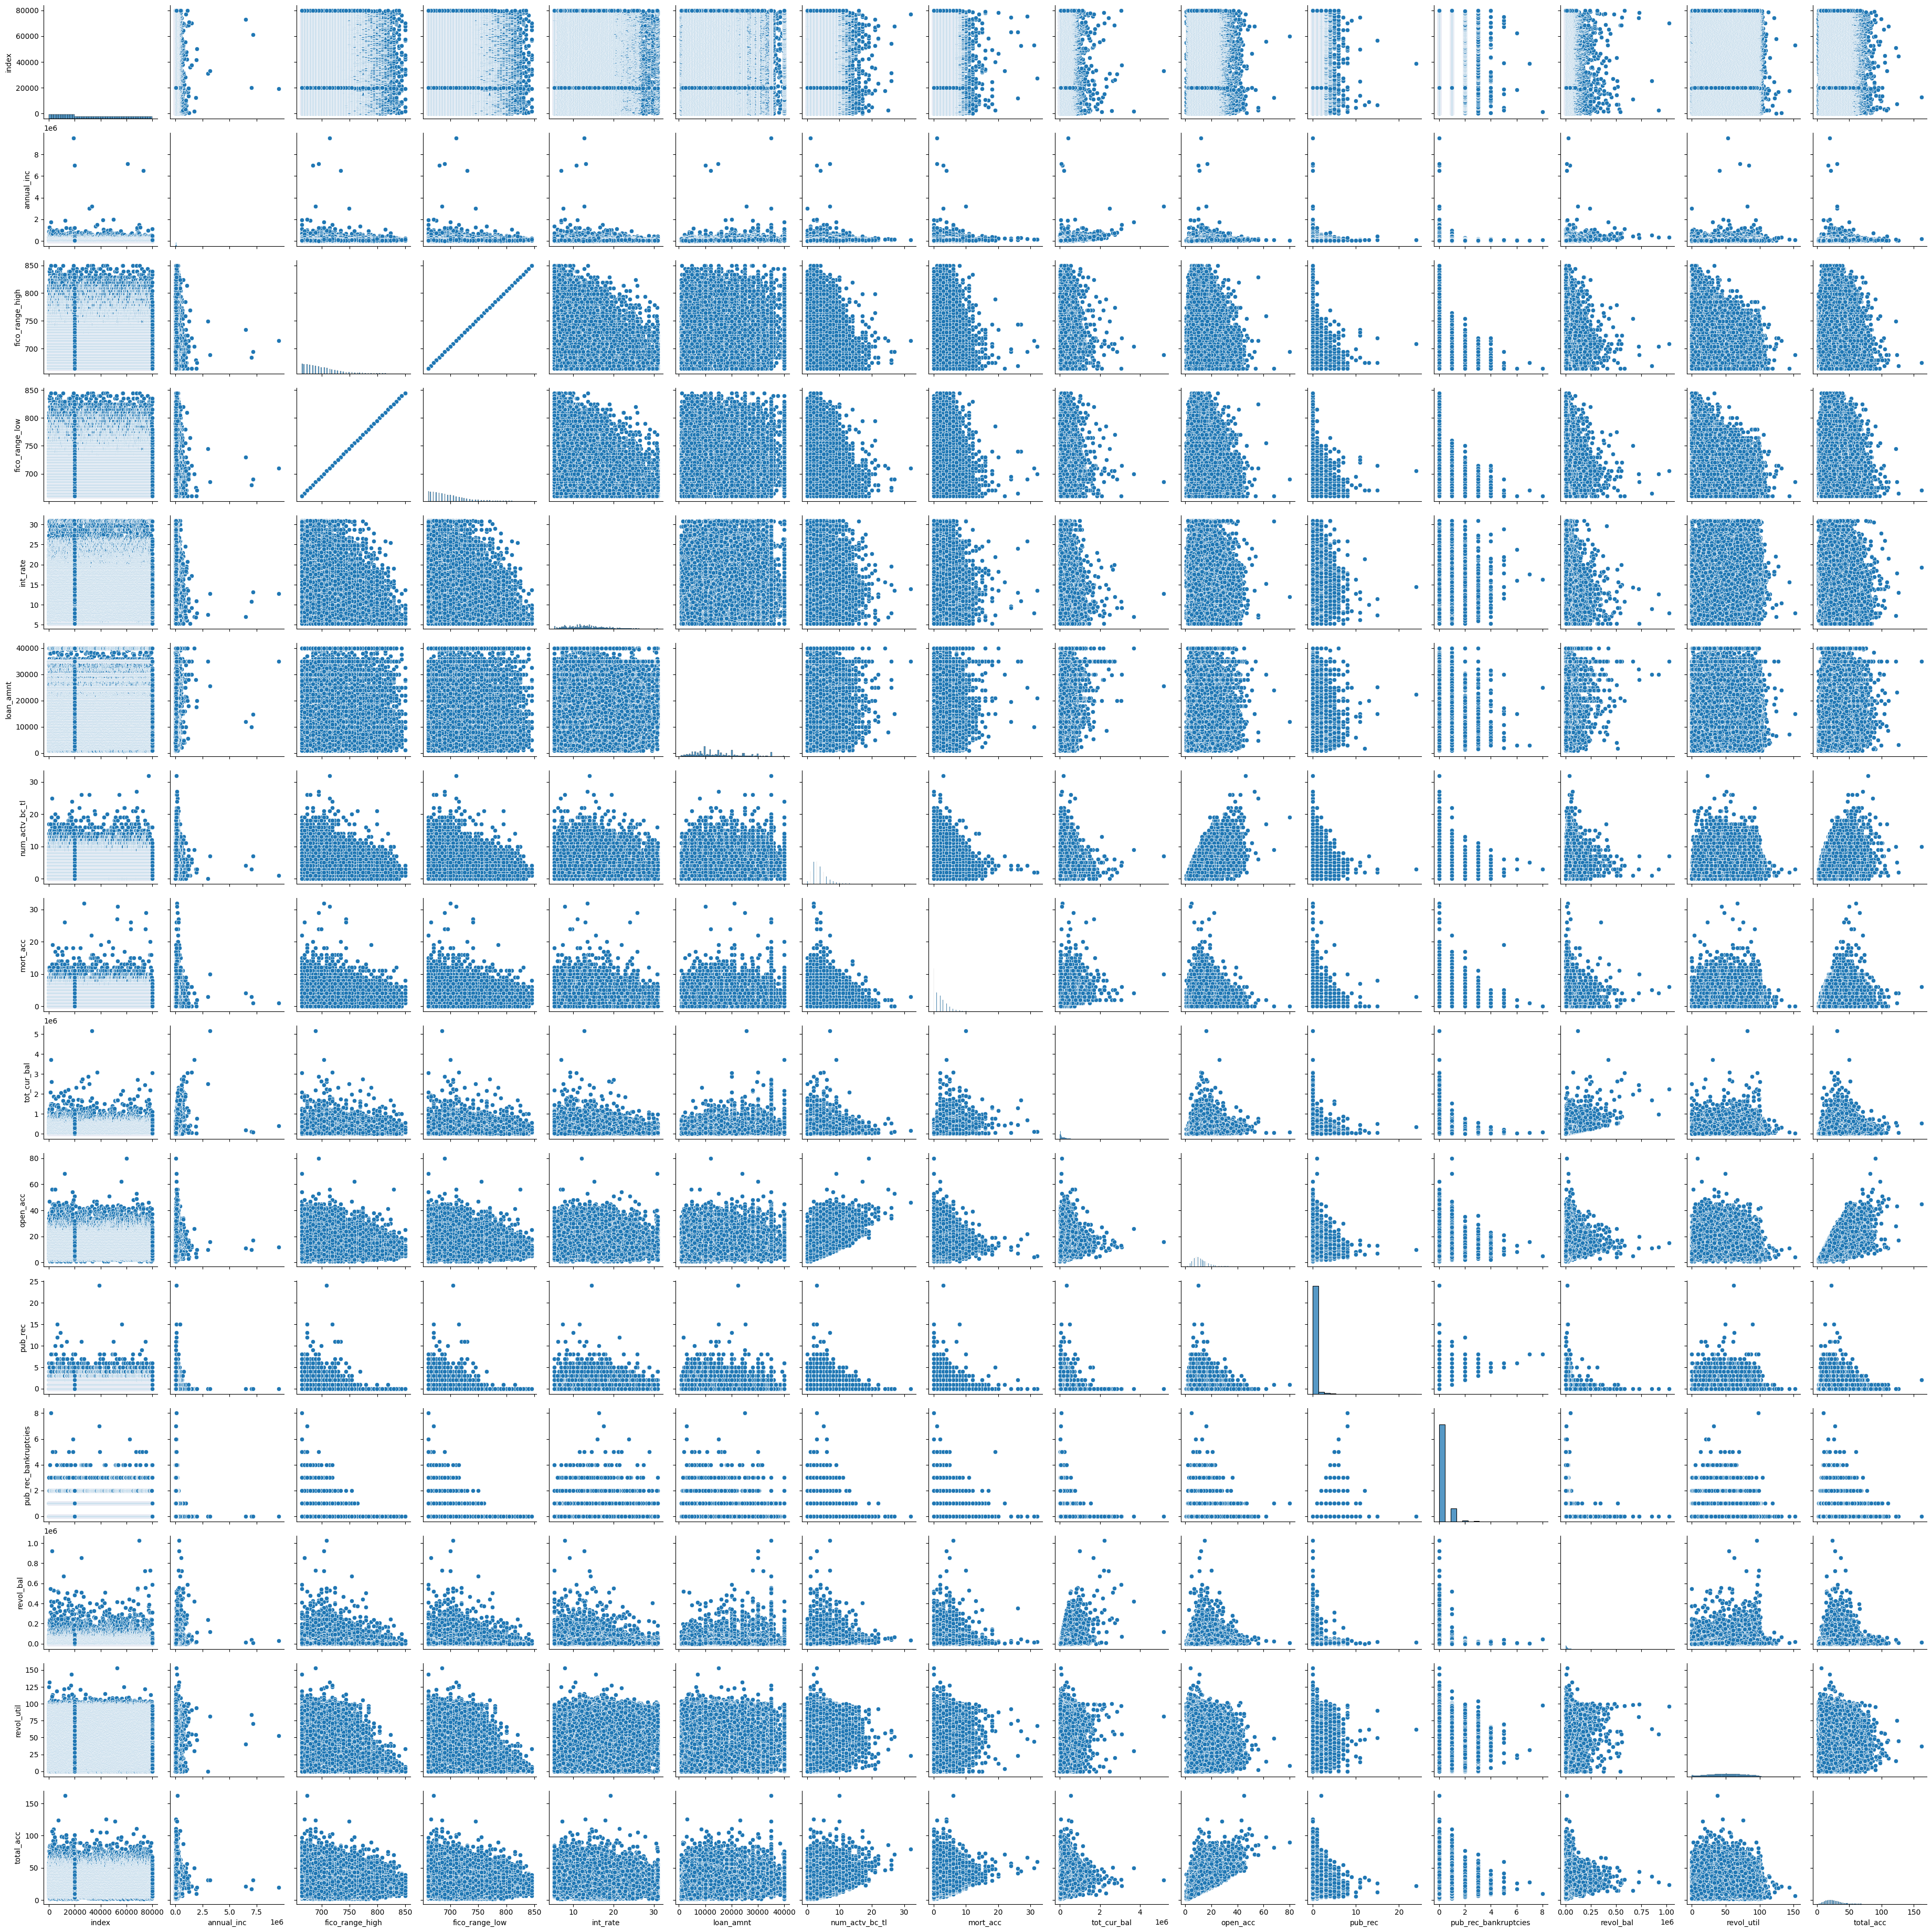

In [ ]:
sns.pairplot(data.select_dtypes(include=np.number).reset_index())

In [ ]:
data['loan_status'].value_counts()

Fully Paid     64030
Charged Off    15970
Name: loan_status, dtype: int64

In [ ]:
data['loan_status'].value_counts(normalize = 'True')

Fully Paid     0.800375
Charged Off    0.199625
Name: loan_status, dtype: float64

Observations:
    From Multivariate Analysis:
    1> NJ has high annual income followed by DC and CT
    2> Loan mostly bought for debt consolidation followed by credit card.
    3> Highest charged off rate is for debt consolidation
    4> CA has most fully paid state.

# Outliers

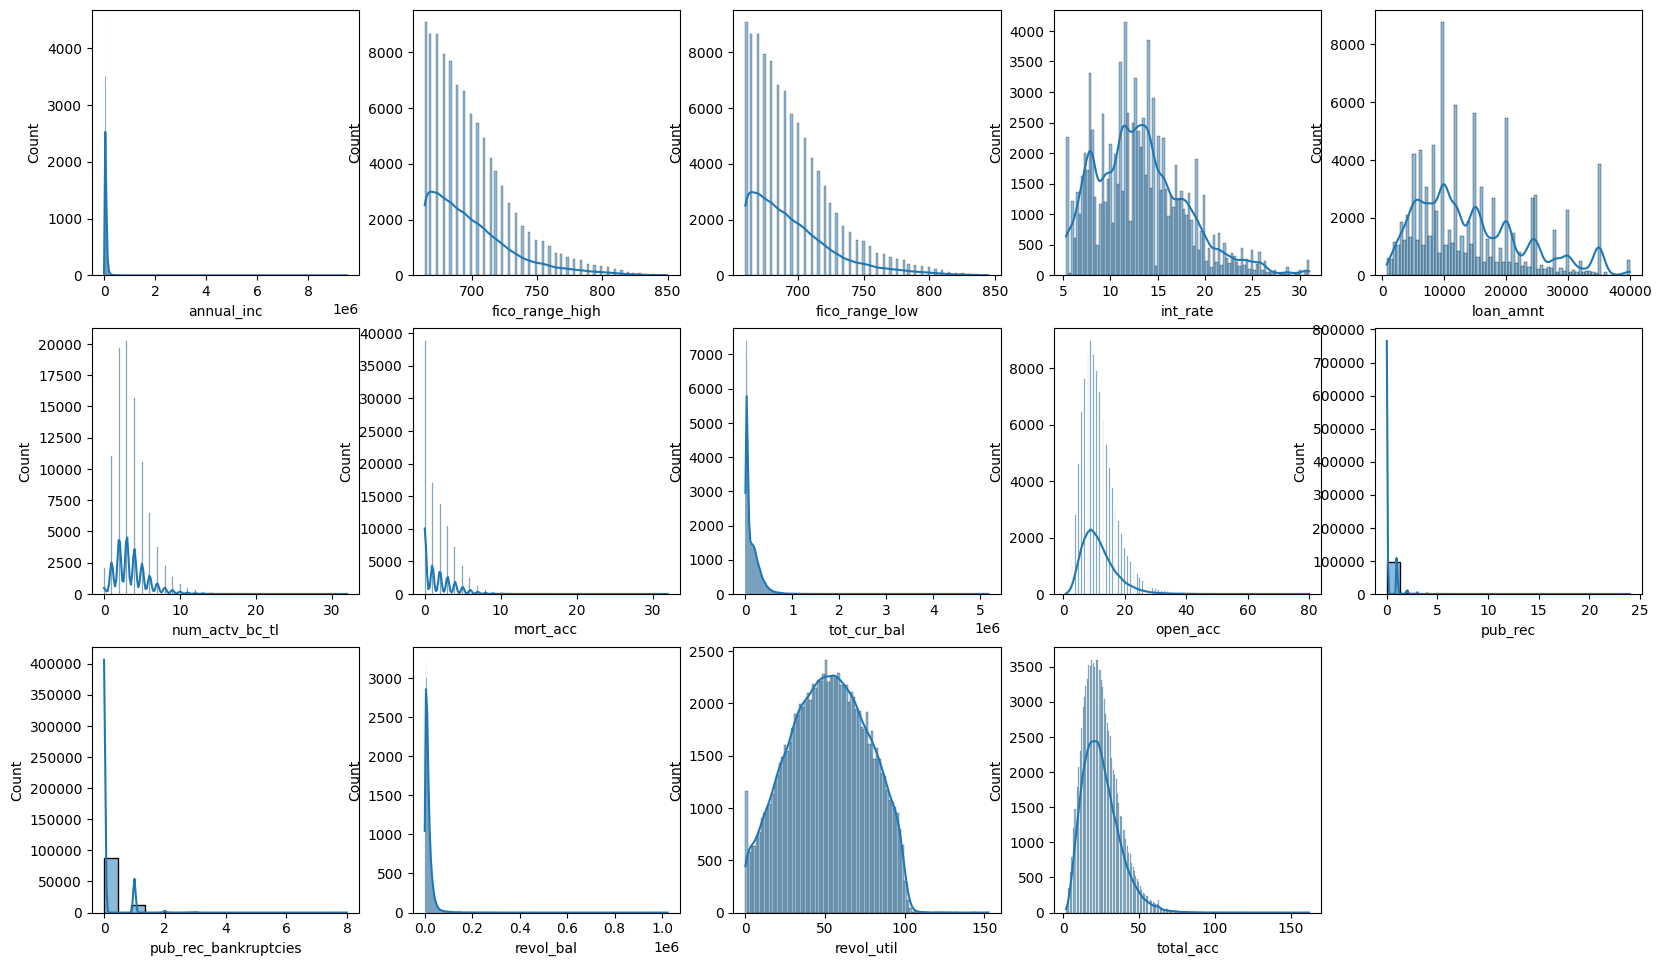

In [ ]:
nrows=5
ncols=5
itr=1

plt.figure(figsize=(20,20))

for col in data.select_dtypes(include = np.number).columns:
  plt.subplot(nrows,ncols,itr)
  sns.histplot(data[col],kde=True)
  itr+=1
plt.show()

In [ ]:
#nrows=5
#ncols=5
#itr=1

#plt.figure(figsize=(20,20))

#for col in data.select_dtypes(include = np.number).columns:
#  plt.subplot(nrows,ncols,itr)
#  sns.boxplot(data[col])
#  itr+=1
#plt.show()




In [ ]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print('\n',col_name.title(),'\n')
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers are: ",'\n',data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    print("****************************")


 Annual_Inc 

Outliers are:  
 19       852000.0
25       221000.0
57       225000.0
129      160000.0
141      190000.0
           ...   
19915    230000.0
19943    170000.0
19962    158000.0
19975    214000.0
19978    286000.0
Name: annual_inc, Length: 4878, dtype: float64
****************************

 Fico_Range_High 

Outliers are:  
 66       789.0
99       784.0
136      779.0
152      799.0
202      779.0
         ...  
19789    784.0
19850    809.0
19856    809.0
19904    799.0
19998    809.0
Name: fico_range_high, Length: 3378, dtype: float64
****************************

 Fico_Range_Low 

Outliers are:  
 66       785.0
99       780.0
136      775.0
152      795.0
202      775.0
         ...  
19789    780.0
19850    805.0
19856    805.0
19904    795.0
19998    805.0
Name: fico_range_low, Length: 3378, dtype: float64
****************************

 Int_Rate 

Outliers are:  
 65       30.74
106      29.99
150      26.24
211      26.30
223      28.14
         ...  
19602    2

In [ ]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(data):

    threshold=3
    mean_1 = np.mean(data)
    std_1 = np.std(data)


    for y in data:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
data.select_dtypes(include=np.number).apply(detect_outlier)

annual_inc  fico_range_high  fico_range_low   int_rate  loan_amnt  \
0        852000.0         852000.0        852000.0   852000.0   852000.0   
1       1250000.0        1250000.0       1250000.0  1250000.0  1250000.0   
2        350000.0         350000.0        350000.0   350000.0   350000.0   
3        325000.0         325000.0        325000.0   325000.0   325000.0   
4        500000.0         500000.0        500000.0   500000.0   500000.0   
...           ...              ...             ...        ...        ...   
15158        62.0             62.0            62.0       62.0       62.0   
15159        73.0             73.0            73.0       73.0       73.0   
15160        73.0             73.0            73.0       73.0       73.0   
15161        63.0             63.0            63.0       63.0       63.0   
15162        64.0             64.0            64.0       64.0       64.0   

       num_actv_bc_tl   mort_acc  tot_cur_bal   open_acc    pub_rec  \
0            852000.0   852000.0     852000.0   852000.0   852000.0   
1           1250000.0  1250000.0    1250000.0  1250000.0  1250000.0   
2            350000.0   350000.0     350000.0   350000.0   350000.0   
3            325000.0   325000.0     325000.0   325000.0   325000.0   
4            500000.0   500000.0     500000.0   500000.0   500000.0   
...               ...        ...          ...        ...        ...   
15158            62.0       62.0         62.0       62.0       62.0   
15159            73.0       73.0         73.0       73.0       73.0   
15160            73.0       73.0         73.0       73.0       73.0   
15161            63.0       63.0         63.0       63.0       63.0   
15162            64.0       64.0         64.0       64.0       64.0   

       pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0                  852000.0   852000.0    852000.0   852000.0  
1                 1250000.0  1250000.0   1250000.0  1250000.0  
2                  350000.0   350000.0    350000.0   350000.0  
3                  325000.0   325000.0    325000.0   325000.0  
4                  500000.0   500000.0    500000.0   500000.0  
...                     ...        ...         ...        ...  
15158                  62.0       62.0        62.0       62.0  
15159                  73.0       73.0        73.0       73.0  
15160                  73.0       73.0        73.0       73.0  
15161                  63.0       63.0        63.0       63.0  
15162                  64.0       64.0        64.0       64.0  

[15163 rows x 14 columns]

# Feature Engineering

In [ ]:
data.describe().T

count           mean            std     min  \
annual_inc            100000.0   76136.444377   72658.271440    0.00   
fico_range_high       100000.0     700.031260      31.741546  664.00   
fico_range_low        100000.0     696.031100      31.740792  660.00   
int_rate              100000.0      13.238209       4.771758    5.31   
loan_amnt             100000.0   14408.428500    8725.405078  750.00   
num_actv_bc_tl         95041.0       3.630517       2.254231    0.00   
mort_acc               96525.0       1.673670       2.000409    0.00   
tot_cur_bal            95041.0  141509.342999  158672.972347    0.00   
open_acc              100000.0      11.603230       5.488242    1.00   
pub_rec               100000.0       0.214940       0.577671    0.00   
pub_rec_bankruptcies   99958.0       0.135827       0.381407    0.00   
revol_bal             100000.0   16267.828280   22504.611482    0.00   
revol_util             99934.0      51.861263      24.505807    0.00   
total_acc             100000.0      25.033960      12.027108    2.00   

                           25%       50%        75%         max  
annual_inc            46000.00  65000.00   90000.00  9522972.00  
fico_range_high         674.00    694.00     714.00      850.00  
fico_range_low          670.00    690.00     710.00      845.00  
int_rate                  9.75     12.74      15.99       30.99  
loan_amnt              7900.00  12000.00   20000.00    40000.00  
num_actv_bc_tl            2.00      3.00       5.00       32.00  
mort_acc                  0.00      1.00       3.00       32.00  
tot_cur_bal           29635.00  80928.00  210875.00  5172185.00  
open_acc                  8.00     11.00      14.00       80.00  
pub_rec                   0.00      0.00       0.00       24.00  
pub_rec_bankruptcies      0.00      0.00       0.00        8.00  
revol_bal              5935.00  11101.00   19675.00  1023940.00  
revol_util               33.40     52.20      70.80      152.60  
total_acc                16.00     23.00      32.00      162.00

In [ ]:
data.head(5)

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0         Jul-1997  10+ years   
1         CA     40000.0         Apr-1987  10+ years   
2         FL     60000.0         Aug-2007  10+ years   
3         IL    100742.0         Sep-1980  10+ years   
4         MD     80000.0         Jul-1999  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   
2                Marble polishing            679.0           675.0     B   
3                         printer            664.0           660.0     B   
4                   Southern Mgmt            669.0           665.0     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     5338.0        93.6         E1   60 months   
1  debt_consolidation    19944.0        60.3         B1   36 months   
2  debt_consolidation    23199.0        88.5         B5   36 months   
3  debt_consolidation    18425.0        69.0         B2   36 months   
4  debt_consolidation    34370.0        90.0         F5   60 months   

                 title  total_acc  verification_status  loan_status  
0   Debt consolidation        8.0      Source Verified  Charged Off  
1          Credit Loan       12.0             Verified   Fully Paid  
2   Debt consolidation       16.0      Source Verified   Fully Paid  
3   Debt consolidation       19.0      Source Verified   Fully Paid  
4  Debt Connsolidation       59.0             Verified   Fully Paid  

[5 rows x 28 columns]

In [ ]:
for i in data.columns:
    print("Columns Name: ",i ,"\n","Column Values: ","\n",data[i].unique(),"\n","Number of values: ",data[i].nunique())
    print("*******************************************************************")

Columns Name:  addr_state 
 Column Values:  
 ['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA'] 
 Number of values:  51
*******************************************************************
Columns Name:  annual_inc 
 Column Values:  
 [ 85000.  40000.  60000. ... 112825.  10750.  47814.] 
 Number of values:  9060
*******************************************************************
Columns Name:  earliest_cr_line 
 Column Values:  
 ['Jul-1997' 'Apr-1987' 'Aug-2007' 'Sep-1980' 'Jul-1999' 'May-1991'
 'Oct-1986' 'Nov-1995' 'Dec-2007' 'Jun-2004' 'Aug-1996' 'Oct-1998'
 'May-2007' 'Oct-2000' 'Jan-2005' 'Apr-2004' 'Sep-2000' 'Sep-1993'
 'Oct-2001' 'May-2001' 'Jun-2006' 'Jan-1998' 'Jan-1999' 'Jul-1998'
 'Jun-2003' 'Jul-2009' 'Nov-2006' 'Feb-2006' 'Aug-2010' 'Apr-2001'
 'Dec-2002' 'Jun-1978

In [ ]:
#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)

#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)
#data_eda["emp_length_new"]=data_eda["emp_length"].astype(str).apply(lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None)
#data_eda.drop(columns='emp_length',inplace=True)

#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)
#data_eda["emp_length_new"]=data_eda["emp_length"].astype(str).apply(lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None)
#data_eda.drop(columns='emp_length',inplace=True)
#data_eda['term_modified'] = data_eda["term"].apply(lambda x: x.split(" ")[1])
#data_eda.drop(columns = 'term', inplace=True)
#data_eda['emp_title_modified']=data_eda['emp_title'].astype(str).apply(lambda s: re.sub(r'[^\w\s]', '', s) )
#data_eda.drop(columns='emp_title',inplace=True)

In [ ]:
#class CustomTranformer(BaseEstimator, TransformerMixin):
#    def __init__(self):
#        pass
#    def fit(self, X,y = None):
#        return self
#    def transform(self, X, y = None):
#        X['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#        X['earliest_cr_line_Month'] = X['earliest_cr_line'].dt.month
#        X['earliest_cr_line_Year'] = X['earliest_cr_line'].dt.year
        #X.drop(columns='earliest_cr_line', inplace=True)
#        X['emp_length_extracted'] = X['emp_length'].astype(str).apply(lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None)
        #X.drop(columns='emp_length', inplace=True)
        #X['term_modified'] = X["term"].astype(str).apply(lambda x: (x[:3]))
        #X.drop(columns = 'term', inplace=True)
#        X['emp_title_modified'] = X['emp_title'].astype(str).apply(lambda s: re.sub(r'[^\w\s]', '', s) )
        #X.drop(columns = 'emp_title', inplace=True)
        #X = X.drop(['date', 'integer_column'], axis=1)
#        return X



class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Perform any necessary setup or calculations here based on the input data X
        return self

    def transform(self, X, y=None):
        X = X.copy()


        X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'])
        X['earliest_cr_line_Month'] = X['earliest_cr_line'].dt.month
        X['earliest_cr_line_Year'] = X['earliest_cr_line'].dt.year


        X['emp_length_extracted'] = X['emp_length'].astype(str).apply(
            lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None
        )


        X['emp_title_modified'] = X['emp_title'].astype(str).apply(lambda s: re.sub(r'[^\w\s]', '', s))


        # X = X.drop(columns=['earliest_cr_line', 'emp_length', 'emp_title'])

        return X


In [ ]:
cat_cols = data.drop(columns=['loan_status','title','term']).select_dtypes(include = object).columns
num_cols = data.select_dtypes(exclude = object).columns
cat_cols,num_cols

(Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
        'home_ownership', 'application_type', 'initial_list_status', 'purpose',
        'sub_grade', 'verification_status'],
       dtype='object'),
 Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
        'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
        'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
        'total_acc'],
       dtype='object'))

In [ ]:
custom_pipeline = Pipeline([
    ('custom_row_modification', CustomTransformer())

])


In [ ]:
numerical = Pipeline([
    ('imputation',SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [ ]:
categorical = Pipeline([
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [ ]:
preprocess_full = ColumnTransformer(
    transformers=
    [
    ('custom',custom_pipeline, ['earliest_cr_line','emp_length','emp_title']),
    ('numerical',numerical, ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate','loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc','pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util','total_acc']),

    ('categorical', categorical, ['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade','home_ownership', 'application_type', 'initial_list_status', 'purpose','sub_grade', 'verification_status'])
])

In [ ]:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   addr_state            100000 non-null  object
 1   annual_inc            100000 non-null  float64
 2   earliest_cr_line      100000 non-null  object
 3   emp_length            94154 non-null   object
 4   emp_title             93604 non-null   object
 5   fico_range_high       100000 non-null  float64
 6   fico_range_low        100000 non-null  float64
 7   grade                 100000 non-null  object
 8   home_ownership        100000 non-null  object
 9   application_type      100000 non-null  object
 10  initial_list_status   100000 non-null  object
 11  int_rate              100000 non-null  float64
 12  loan_amnt             100000 non-null  float64
 13  num_actv_bc_tl        95041 non-null   float64
 14  mort_acc              96525 non-null   float64
 15  tot_cur_bal           95041 non-null   float64
 16  open_acc              100000 non-null  float64
 17  pub_rec               100000 non-null  float64
 18  pub_rec_bankruptcies  99958 non-null   float64
 19  purpose               100000 non-null  object
 20  revol_bal             100000 non-null  float64
 21  revol_util            99934 non-null   float64
 22  sub_grade             100000 non-null  object
 23  term                  100000 non-null  object
 24  title                 98783 non-null   object
 25  total_acc             100000 non-null  float64
 26  verification_status   100000 non-null  object
 27  loan_status           80000 non-null   object
dtypes: float64(14), object(14)
memory usage: 22.1+ MB

In [ ]:
from sklearn import set_config
set_config(display='diagram')
display(preprocess_full)

ColumnTransformer(transformers=[('custom',
                                 Pipeline(steps=[('custom_row_modification',
                                                  CustomTransformer())]),
                                 ['earliest_cr_line', 'emp_length',
                                  'emp_title']),
                                ('numerical',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['annual_inc', 'fico_range_high',
                                  'fico_range_low', 'int_rate', 'loan_amnt',
                                  'num_actv_bc_tl', 'mort_acc', 'tot_c...
                                  'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
                                  'revol_bal', 'revol_util', 'total_acc']),
                                ('categorical',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['addr_state', 'earliest_cr_line',
                                  'emp_length', 'emp_title', 'grade',
                                  'home_ownership', 'application_type',
                                  'initial_list_status', 'purpose', 'sub_grade',
                                  'verification_status'])])

In [ ]:
preprocess_full.fit(data.drop(columns=['title','loan_status','term']))